<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [35]:
pip install split_folders


In [39]:
import split_folders

 #Split with a ratio.To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/drive/My Drive/data-liverdisease', output="/content/drive/My Drive/data_liver", seed=1337, ratio=(.7,.1,.2)) # default values

Copying files: 1000 files [06:07,  2.72 files/s]


In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/val", target_size=(224,224))

Found 700 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

553467904/553467096 [==============================] - 18s 0us/step


In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
vggmodel.layers.pop()
vggmodel.layers.pop()
vggmodel.layers.pop()

In [6]:
for layers in (vggmodel.layers):
    print(layers)
    layers.trainable = False

In [7]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-1].output
fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.5)(fc_1)
fc_2=Dense(4096, activation='relu')(dr_1)
dr_2=Dropout(0.5)(fc_2)
predictions = Dense(4, activation="softmax")(dr_2)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [9]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [11]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_g_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist=model_final.fit(traindata, steps_per_epoch= 64, epochs= 50, validation_data= testdata, validation_steps=16, callbacks=[checkpoint,early])

Epoch 1/50
64/64 [==============================] - 993s 16s/step - loss: 1.4588 - accuracy: 0.7564 - val_loss: 1.2739 - val_accuracy: 0.7600

Epoch 00001: val_accuracy improved from -inf to 0.76000, saving model to /content/drive/My Drive/Best models/model_g_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/50
64/64 [==============================] - 913s 14s/step - loss: 0.5618 - accuracy: 0.8806 - val_loss: 5.7749 - val_accuracy: 0.8300

Epoch 00002: val_accuracy improved from 0.76000 to 0.83000, saving model to /content/drive/My Drive/Best models/model_g_1.h5
Epoch 3/50
64/64 [==============================] - 894s 14s/step - loss: 0.1906 - accuracy: 0.9431 - val_loss: 0.0282 - val_accuracy: 0.8400

Epoch 00003: val_accuracy improved from 0.83000 to 0.84000, saving model to /content/drive/My Drive/Best models/model_g_1.h5
Epoch 4/50
64/64 [==============================] - 880s 14s/step - loss: 0.1692 - accuracy: 0.9582 - val_loss: 1.2765 - val_accuracy: 0.8800

Epoch 00004: val_accuracy improved from 0.84000 to 0.88000, saving model to /content/drive/My Drive/Best models/model_g_1.h5
Epoch 5/50
64/64 [==============================] - 881s 14s/step - loss: 0.0770 - accuracy: 0.9770 - val_loss: 0.0015 - val_accuracy: 0.8800

Epoch 00005: val_accuracy did not improve from 0.8800

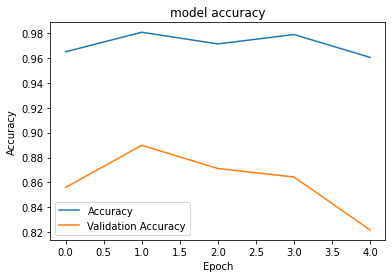

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

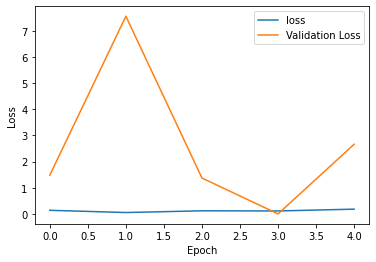

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [26]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_liver/test',
                                                        target_size=(224, 224))

Found 200 images belonging to 4 classes.


In [27]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_final.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[17 10  9 14]
 [10 10 18 12]
 [21  6 12 11]
 [14  9 15 12]]
Classification Report
              precision    recall  f1-score   support

           0       0.27      0.34      0.30        50
           1       0.29      0.20      0.24        50
           2       0.22      0.24      0.23        50
           3       0.24      0.24      0.24        50

    accuracy                           0.26       200
   macro avg       0.26      0.26      0.25       200
weighted avg       0.26      0.26      0.25       200



In [33]:
import os
import numpy as np

data_path='/content/drive/My Drive/data_liver/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 26 WrongCount 24
grade0
correct Count 44 WrongCount 6
grade2
correct Count 48 WrongCount 2
grade3
correct Count 48 WrongCount 2


In [20]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

7/7 [==============================] - 106s 15s/step


0.7699999809265137

In [63]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

22/22 [==============================] - 355s 16s/step


0.9857142567634583

In [72]:
tr_loss,tr_acc=model_final.evaluate(testdata)
tr_acc

4/4 [==============================] - 51s 13s/step


0.8199999928474426

In [6]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

In [7]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

4/4 [==============================] - 51s 13s/step


0.8799999952316284

In [10]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

4/4 [==============================] - 51s 13s/step


0.7900000214576721

In [32]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")